In [1]:
import HTSeq
import glob
import seaborn
import matplotlib.pyplot as plt
import numpy
from scipy.stats.stats import pearsonr
import numpy as np

In [2]:
files = 0
names = []
GC_info = {}
for cfile in glob.glob('./Studied_genomes/*.fasta'):
    name = cfile.split('/')[2].replace('.fasta','')
    names.append(name)
    files +=1
    GC = 0
    AT = 0
    for read in HTSeq.FastaReader(cfile):
        for letter in read.seq:
            letter = letter.capitalize()
            if letter == 'A' or letter == 'T':
                AT +=1
            else: 
                GC +=1
    print name
    print (GC / float(AT+GC))*100
    GC_info[name] = (GC / float(AT+GC))*100
            
    
print "Analysed; ", files

Aeropyrum pernix
56.3112686381
Aquifex aeolicus
43.4761673011
Archaeoglobus fulgidus
48.5816654425
Hyperthermus butyilicus
53.7367371997
Methanococcus jannaschii
31.4270527397
Methanopyrus kandleri AV19
61.1591716427
Methanothermus fervidus
31.6369912703
Pyrococcus furiosus
40.7698967015
Pyrodicitium abyssi
44.7138944818
Pyrolobus fumarii
54.9041457369
Sulfolobus acidocaldarius
36.7075943447
Thermocrinis minervae
44.5275714021
Thermocrinis ruber
45.1919315572
Thermotoga maritima
46.2477260208
Analysed;  14


In [3]:
species_temp = {}

species_temp['Aeropyrum pernix'] =  100
species_temp['Aquifex aeolicus'] =  95
species_temp['Archaeoglobus fulgidus'] =  95
species_temp['Hyperthermus butyilicus'] =  112
species_temp['Methanococcus jannaschii'] =  85
species_temp['Methanopyrus kandleri AV19'] =  122
species_temp['Methanothermus fervidus'] =  97
species_temp['Pyrococcus furiosus'] =  105
species_temp['Pyrodicitium abyssi'] =  110
species_temp['Pyrolobus fumarii'] =  113
species_temp['Sulfolobus acidocaldarius'] =  85
species_temp['Thermocrinis minervae'] =  85
species_temp['Thermocrinis ruber'] =  89
species_temp['Thermotoga maritima'] =  90




In [4]:
species_temp

{'Aeropyrum pernix': 100,
 'Aquifex aeolicus': 95,
 'Archaeoglobus fulgidus': 95,
 'Hyperthermus butyilicus': 112,
 'Methanococcus jannaschii': 85,
 'Methanopyrus kandleri AV19': 122,
 'Methanothermus fervidus': 97,
 'Pyrococcus furiosus': 105,
 'Pyrodicitium abyssi': 110,
 'Pyrolobus fumarii': 113,
 'Sulfolobus acidocaldarius': 85,
 'Thermocrinis minervae': 85,
 'Thermocrinis ruber': 89,
 'Thermotoga maritima': 90}

14


(0.6722893642127985, 0.0084388291028078249)

/Users/thomashitch/lab-dev/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


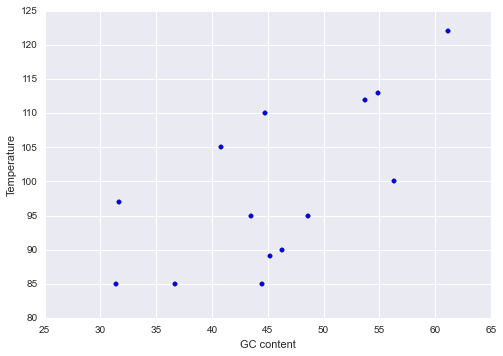

In [5]:
GC_temp = {}

for k,v in GC_info.iteritems():
    if k in species_temp:
        GC_temp[v] = species_temp[k]
    
print len(GC_temp.keys())  
plt.scatter(GC_temp.keys(), GC_temp.values())
plt.xlabel('GC content')
plt.ylabel('Temperature')


pearsonr(GC_temp.keys(), GC_temp.values())

14


(0.6722893642127985, 0.0084388291028078249)

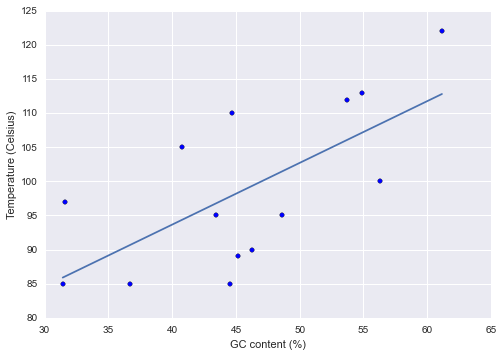

In [7]:
GC_temp = {}

for k,v in GC_info.iteritems():
    if k in species_temp:
        GC_temp[v] = species_temp[k]
    
x = GC_temp.keys()
y = GC_temp.values()
print len(GC_temp.keys())  
plt.scatter(GC_temp.keys(), GC_temp.values())
plt.xlabel('GC content (%)')
plt.ylabel('Temperature (Celsius)')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlim(30,65)

plt.savefig('GC_linear_regression.pdf')

pearsonr(GC_temp.keys(), GC_temp.values())

In [8]:
GC_temp

{31.427052739689003: 85,
 31.63699127030214: 97,
 36.70759434472962: 85,
 40.76989670149079: 105,
 43.476167301066496: 95,
 44.52757140214968: 85,
 44.71389448184201: 110,
 45.1919315572205: 89,
 46.24772602077147: 90,
 48.58166544252662: 95,
 53.736737199661945: 112,
 54.90414573688999: 113,
 56.311268638123344: 100,
 61.15917164266721: 122}

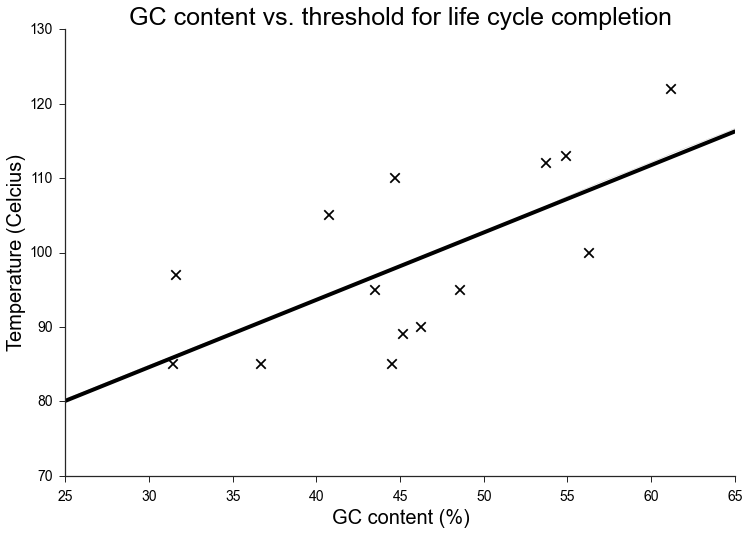

In [33]:
import matplotlib.pyplot as plt  #sets up plotting under plt
import seaborn as sns           #sets up styles and gives us more plotting options
import pandas as pd             #lets us handle data as dataframes

outputting = open('temp.csv','w')
outputting.write('GC,Temperature\n')
for k,v in GC_temp.iteritems():
    outputting.write(str(k) + ',' + str(v) + '\n')
outputting.close()
tips = pd.DataFrame.from_csv('temp.csv', index_col=None)

# We dont Probably need the Gridlines. Do we? If yes comment this line
sns.set(style="ticks")

# Here we create a matplotlib axes object. The extra parameters we use
# "ci" to remove confidence interval
# "marker" to have a x as marker.
# "scatter_kws" to provide style info for the points.[s for size]
# "line_kws" to provide style info for the line.[lw for line width]

g = sns.regplot(x="GC", y="Temperature", data=tips, ci = False,
    scatter_kws={"color":"black","alpha":1.0,"s":90},
    line_kws={"color":"black","alpha":1.0,"lw":4},marker="x")

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,8)
# Set the Title of the graph from here
g.axes.set_title('GC content vs. threshold for life cycle completion', fontsize=25,color="black",alpha=1.0)
# Set the xlabel of the graph from here
g.set_xlabel("GC content (%)",size = 20,color="black",alpha=1.0)
# Set the ylabel of the graph from here
g.set_ylabel("Temperature (Celcius)",size = 20,color="black",alpha=1.0)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")
plt.savefig('GC_linear_regression.pdf')


In [16]:
tips

,GC,Temperature
0,31.427053,85
1,40.769897,105
2,54.904146,113
3,44.713894,110
4,48.581665,95
5,36.707594,85
6,31.636991,97
7,46.247726,90
8,61.159172,122
9,43.476167,95
